<h1><center>Decision Trees</center></h1>

You will master a popular machine learning algorithm, Decision Tree, in this lab practice. You will use this classification technique to create a model based on previous patient data and their responses to various drugs. The trained decision tree is then used to predict the class of an unknown patient or to locate a suitable medicine for a new patient.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 30px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Download Data</a></li>
        <li><a href="#pre-processing">Data Pre-processing and Cleaning</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    As a medical researcher, picture yourself gathering information for a study. The focus of your data collection is a group of patients, all of whom were afflicted with the same ailment. Each of these patients received one of the five medications - Drug A, Drug B, Drug C, Drug X, and Drug Y - as part of their treatment plan.
    <br>
    <br>
    One of your professional responsibilities entails constructing a model aimed at determining the optimal medication for a prospective patient suffering from the same illness. The dataset utilized for this purpose comprises feature sets such as patients' Age, Sex, Blood Pressure, and Cholesterol, while the target variable pertains to the drug that each patient responded to.
    <br>
    <br>
    This paragraph pertains to a binary classifier sample, wherein the training subset of the dataset may be employed to create a decision tree. Subsequently, the decision tree can be utilized to forecast the category of an unfamiliar patient or recommend it as a prescription for a novel patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2023-04-30 23:27:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: 'drug200.csv'

     0K .....                                                 100% 1.60G=0s

2023-04-30 23:27:11 (1.60 GB/s) - 'drug200.csv' saved [6027/6027]



now, read data using pandas dataframe:

In [3]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    Information About the dataset
</div>

In [4]:
my_data.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As we may have noticed, certain features present in this dataset, such as 'Sex' or 'BP', are categorical in nature. However, it is unfortunate that Sklearn Decision Trees are not capable of handling such variables in their original form. Nevertheless, it is possible to convert these features into numerical values. This can be accomplished using the 'pandas.get_dummies()' method, which facilitates the conversion of categorical variables into dummy or indicator variables.

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [7]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    In our analysis, we will implement a <b>train/test split</b> on the <b>decision tree</b>. To accomplish this, we will import the <b>"train_test_split"</b> function from the <b>"sklearn.cross_validation"</b> module.
</div>

In [8]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
print(X_trainset.shape)
print(y_trainset.shape)

(140, 5)
(140,)


In [11]:
print(X_testset.shape)
print(y_testset.shape)

(60, 5)
(60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [13]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [14]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [15]:
print(predTree [0:5])
print(y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [17]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [18]:
#import six
#import sys
#from sklearn.externals.six import StringIO
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

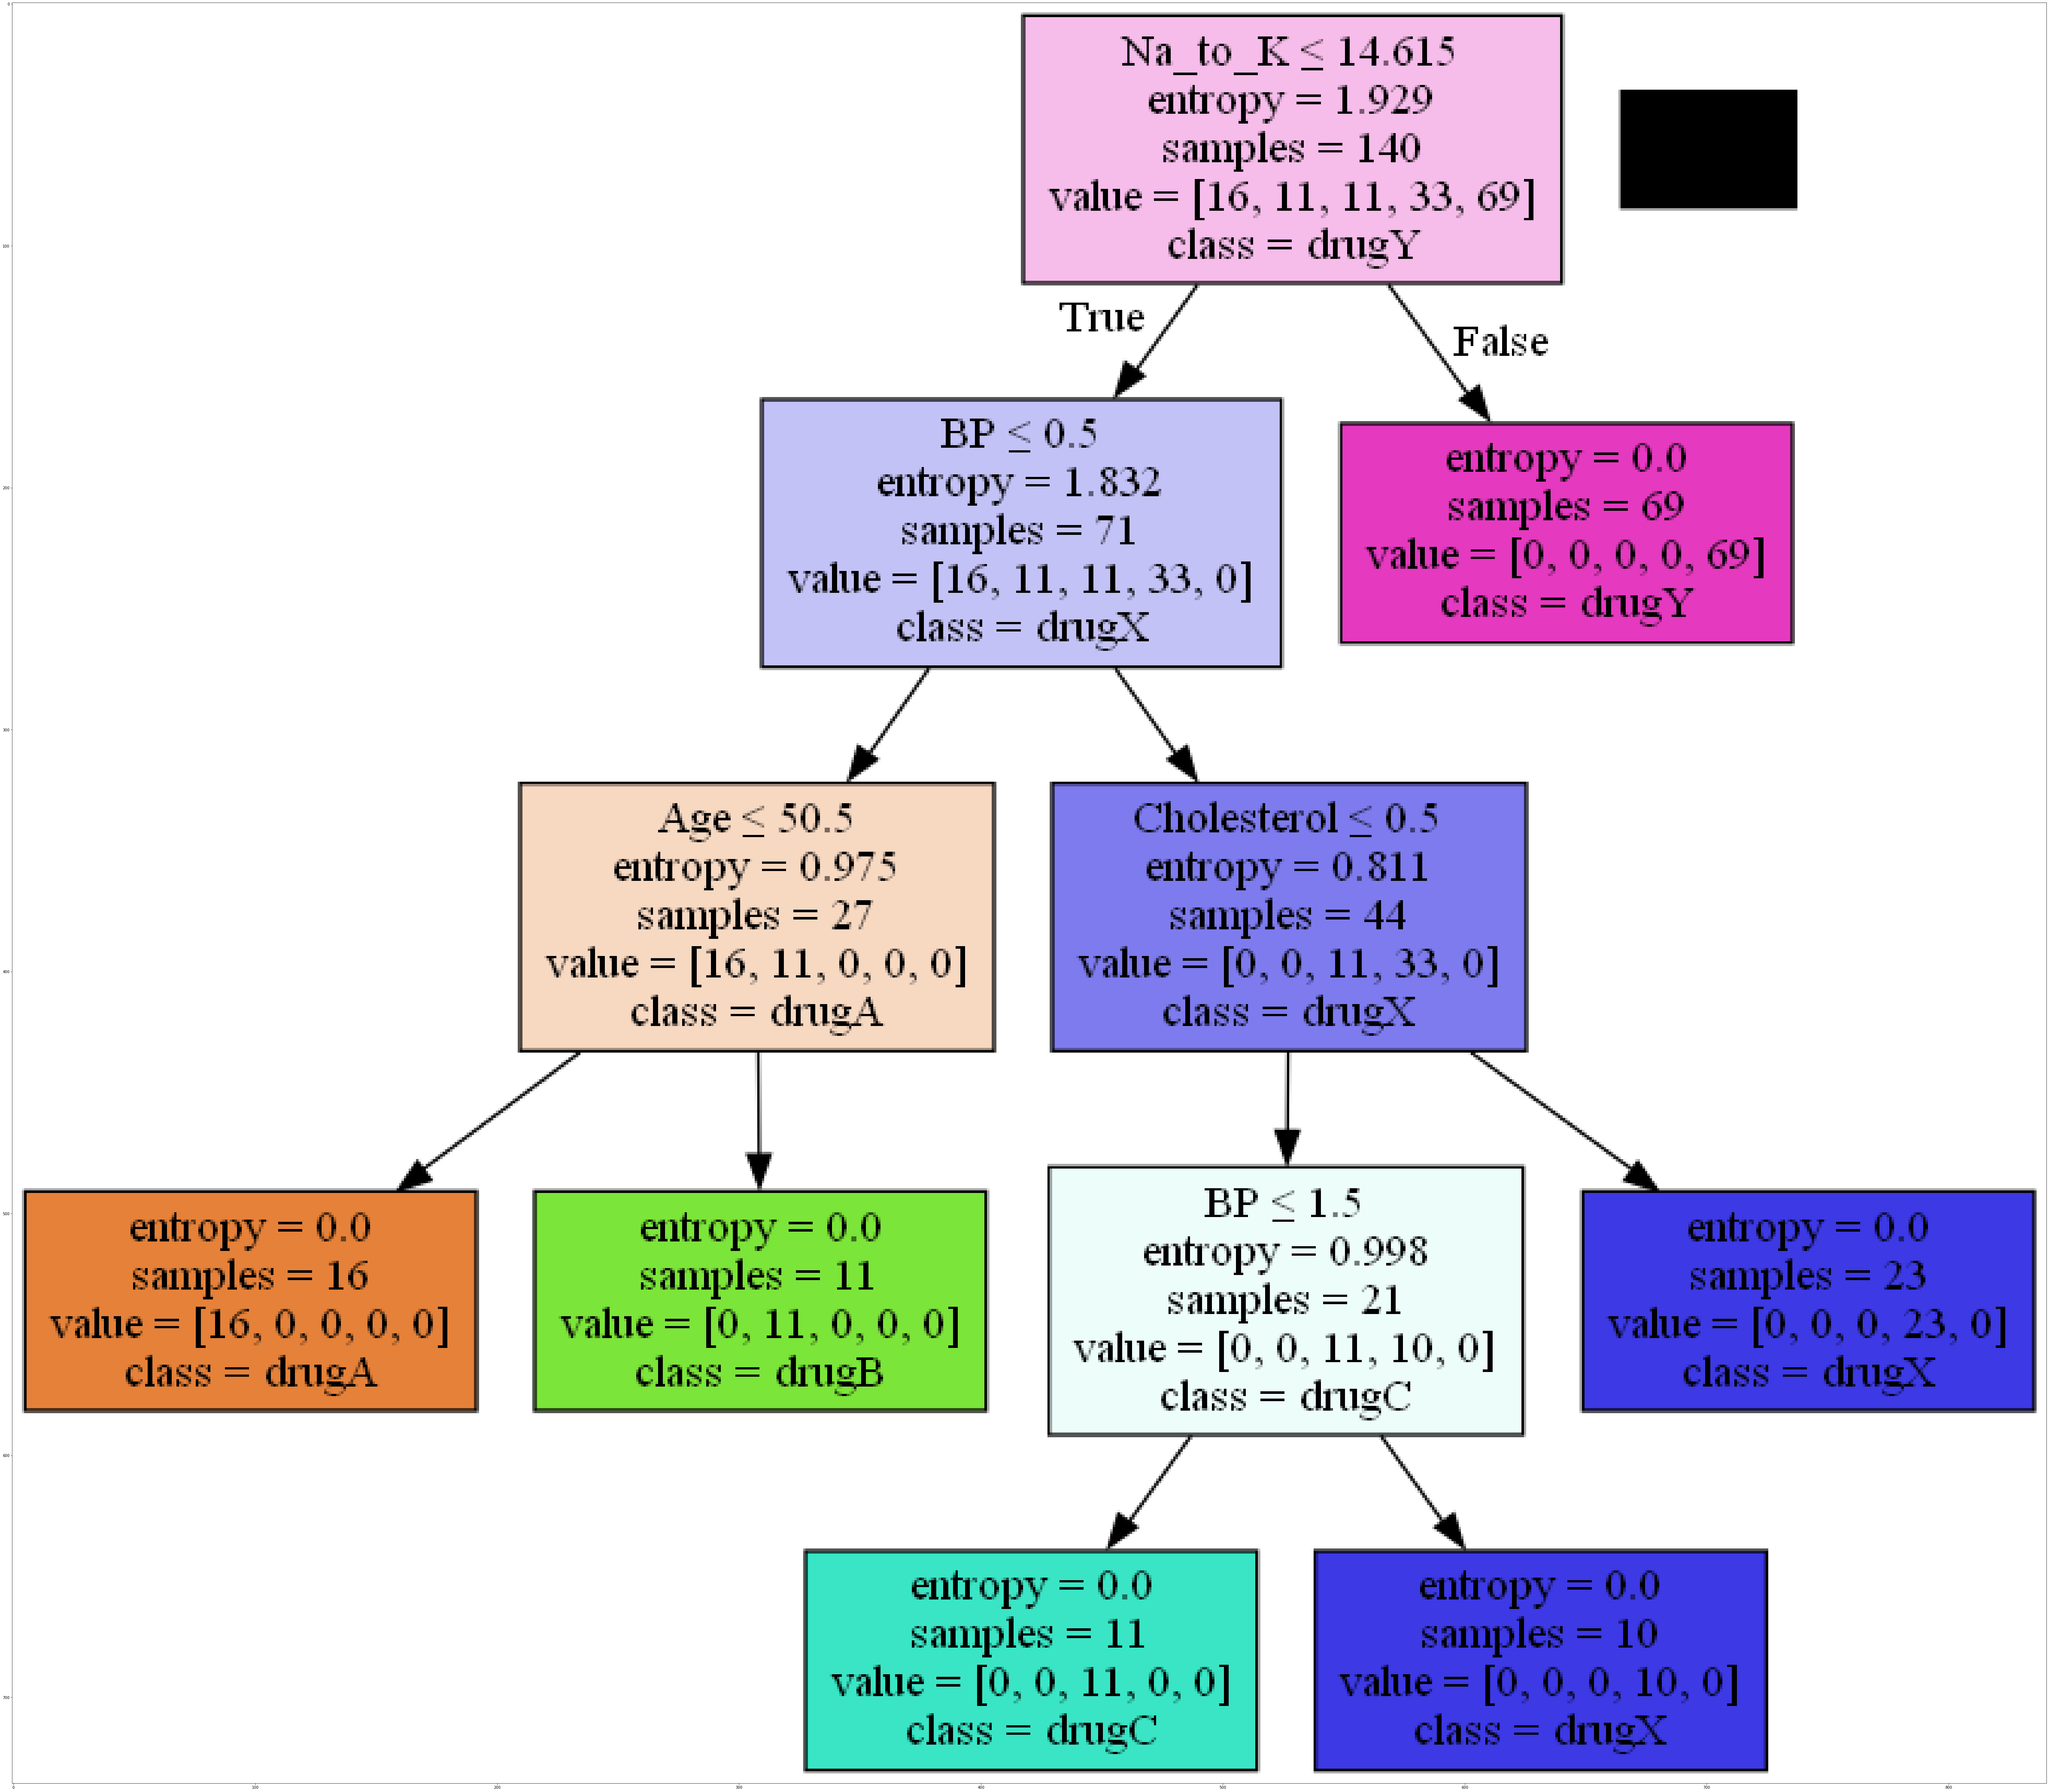

In [19]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h2>About the Author?</h2>

Check out my CodeSignal and GitHub profiles to see my expertise and the challenges I've tackled. Discover my skills and experience in programming: <a href="https://app.codesignal.com/profile/zakariyae_c">Zakariyae CHATRI: CodeSignal</a>

In addition, if you're working with larger datasets, you can leverage Watson Studio to run your notebooks with greater speed. Watson Studio, IBM's premier cloud-based solution for data scientists, was developed by data scientists themselves. With Jupyter notebooks, RStudio, Apache Spark, and popular libraries pre-installed in the cloud, Watson Studio empowers data scientists to collaborate on their projects without the need for manual installations. 

<h4>Author:  <a href="https://www.linkedin.com/in/zakariyae-chatri-338448151/">Zakariyae CHATRI</a></h4>
<p><a href="https://www.linkedin.com/in/zakariyae-chatri-338448151/">Zakariyae CHATRI</a>, is a current PhD candidate in the field of Natural Language Processing (NLP) and Neural Machine Translation at the University of Sapienza of Rome in collaboration with the Council National of Research - The Istituto di Linguistica Computazionale "A. Zampolli" in Pisa, Italy. He is motivated to create innovative and practical contributions to the field. In light of this, his supervisors have suggested that he focuses on expanding the Arabic resources available for NLP algorithms. This includes developing accurate models for part-of-speech (PoS) tag recognition and utilizing Deep Learning techniques, such as the architectures of Bert and LSTMs, to create a Neural Machine Translation model for Arabic. Additionally, Zakariyae CHATRI plans to conduct morphological analyses of the Arabic language.</p>
<p>On the other hand, Zakariyae CHATRI is also a skilled Data Scientist, Data Analyst, and Data Engineer, currently employed at the multinational company "ALTEN". He is well-versed in working with data and is deeply passionate about the fields of data science, machine learning, and data-driven decision-making.</p>